In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import BatchNormalization
from sklearn import preprocessing
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from warnings import filterwarnings

import seaborn as sns
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
from pathlib import Path

import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix


In [2]:
import os
for dirname, _, filenames in os.walk('Healthcare'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path = r"Healthcare\Training"

Healthcare\Testing\glioma_tumor\image(1).jpg
Healthcare\Testing\glioma_tumor\image(10).jpg
Healthcare\Testing\glioma_tumor\image(100).jpg
Healthcare\Testing\glioma_tumor\image(11).jpg
Healthcare\Testing\glioma_tumor\image(12).jpg
Healthcare\Testing\glioma_tumor\image(13).jpg
Healthcare\Testing\glioma_tumor\image(14).jpg
Healthcare\Testing\glioma_tumor\image(15).jpg
Healthcare\Testing\glioma_tumor\image(16).jpg
Healthcare\Testing\glioma_tumor\image(17).jpg
Healthcare\Testing\glioma_tumor\image(18).jpg
Healthcare\Testing\glioma_tumor\image(19).jpg
Healthcare\Testing\glioma_tumor\image(2).jpg
Healthcare\Testing\glioma_tumor\image(20).jpg
Healthcare\Testing\glioma_tumor\image(21).jpg
Healthcare\Testing\glioma_tumor\image(22).jpg
Healthcare\Testing\glioma_tumor\image(23).jpg
Healthcare\Testing\glioma_tumor\image(24).jpg
Healthcare\Testing\glioma_tumor\image(25).jpg
Healthcare\Testing\glioma_tumor\image(26).jpg
Healthcare\Testing\glioma_tumor\image(27).jpg
Healthcare\Testing\glioma_tumor\ima

In [3]:
labels = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [4]:
from tqdm import tqdm
X_train = []
Y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('Healthcare','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Healthcare','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 206.39it/s]


In [5]:
X_train, Y_train = shuffle(X_train,Y_train, random_state=101)
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train, test_size=0.1,random_state=101)

In [6]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)


Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

(-0.5, 149.5, 149.5, -0.5)

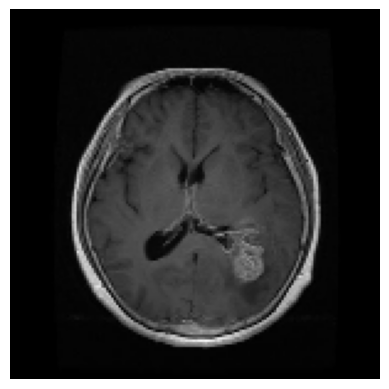

In [7]:
img_size = 150

img_array = cv2.imread('Healthcare\Training\glioma_tumor\gg (10).jpg')
new_arr = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_arr,cmap='gray')
plt.axis("off")

In [8]:
datagen=ImageDataGenerator(
    featurewise_center =False,
    samplewise_center = False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False)

# Call Back

In [9]:
Call_Back_Early = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                   patience=5,
                                                   mode="min")
Call_Back_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_model1")

In [10]:
number_of_epochs = 50

# VGG16

In [11]:
from tensorflow.keras.models import Model
base_model_5 = VGG16(pooling='avg', weights=None, include_top=False, input_shape=(150,150,3))
for layers in base_model_5.layers:
            layers.trainable=False

In [12]:
last_output = base_model_5.layers[-1].output
x = Flatten()(last_output)
x = Dense(128, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model_5 = Model(base_model_5.input, x)
model_5.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [48]:
model_5.summary()
number_of_layers = len(model_5.layers)
print("Number of layers:", number_of_layers)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
vgg16 = model_5.fit(datagen.flow(X_train,Y_train,batch_size = 40), epochs = number_of_epochs ,validation_data=(X_test,Y_test),verbose=1, callbacks=[Call_Back_Early, Call_Back_Check])

Epoch 1/50
74/74 [==============================] - ETA: 0s - loss: 1.3597 - accuracy: 0.3136

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 134s 2s/step - loss: 1.3597 - accuracy: 0.3136 - val_loss: 1.3555 - val_accuracy: 0.2661
Epoch 2/50
74/74 [==============================] - ETA: 0s - loss: 1.3139 - accuracy: 0.4025

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 1.3139 - accuracy: 0.4025 - val_loss: 1.2835 - val_accuracy: 0.4251
Epoch 3/50
74/74 [==============================] - ETA: 0s - loss: 1.2759 - accuracy: 0.4195

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 134s 2s/step - loss: 1.2759 - accuracy: 0.4195 - val_loss: 1.2394 - val_accuracy: 0.4587
Epoch 4/50
74/74 [==============================] - ETA: 0s - loss: 1.2288 - accuracy: 0.4593

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 1.2288 - accuracy: 0.4593 - val_loss: 1.2029 - val_accuracy: 0.4771
Epoch 5/50
74/74 [==============================] - ETA: 0s - loss: 1.2008 - accuracy: 0.4695

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 1.2008 - accuracy: 0.4695 - val_loss: 1.2269 - val_accuracy: 0.4985
Epoch 6/50
74/74 [==============================] - 131s 2s/step - loss: 1.1737 - accuracy: 0.4957 - val_loss: 1.2047 - val_accuracy: 0.4709
Epoch 7/50
74/74 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.5080

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 1.1482 - accuracy: 0.5080 - val_loss: 1.1231 - val_accuracy: 0.5168
Epoch 8/50
74/74 [==============================] - ETA: 0s - loss: 1.1161 - accuracy: 0.5325

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 137s 2s/step - loss: 1.1161 - accuracy: 0.5325 - val_loss: 1.1234 - val_accuracy: 0.5321
Epoch 9/50
74/74 [==============================] - ETA: 0s - loss: 1.1116 - accuracy: 0.5329

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 136s 2s/step - loss: 1.1116 - accuracy: 0.5329 - val_loss: 1.1128 - val_accuracy: 0.6024
Epoch 10/50
74/74 [==============================] - 132s 2s/step - loss: 1.0943 - accuracy: 0.5485 - val_loss: 1.0847 - val_accuracy: 0.5076
Epoch 11/50
74/74 [==============================] - 132s 2s/step - loss: 1.0597 - accuracy: 0.5455 - val_loss: 1.0555 - val_accuracy: 0.5963
Epoch 12/50
74/74 [==============================] - 132s 2s/step - loss: 1.0481 - accuracy: 0.5529 - val_loss: 1.0752 - val_accuracy: 0.5352
Epoch 13/50
74/74 [==============================] - 132s 2s/step - loss: 1.0433 - accuracy: 0.5570 - val_loss: 1.0223 - val_accuracy: 0.5872
Epoch 14/50
74/74 [==============================] - ETA: 0s - loss: 1.0179 - accuracy: 0.5737

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 134s 2s/step - loss: 1.0179 - accuracy: 0.5737 - val_loss: 1.0050 - val_accuracy: 0.6055
Epoch 15/50
74/74 [==============================] - ETA: 0s - loss: 1.0106 - accuracy: 0.5635

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 1.0106 - accuracy: 0.5635 - val_loss: 1.0134 - val_accuracy: 0.6086
Epoch 16/50
74/74 [==============================] - 131s 2s/step - loss: 0.9915 - accuracy: 0.5850 - val_loss: 1.0473 - val_accuracy: 0.5321
Epoch 17/50
74/74 [==============================] - 131s 2s/step - loss: 0.9815 - accuracy: 0.5832 - val_loss: 1.0000 - val_accuracy: 0.5627
Epoch 18/50
74/74 [==============================] - 131s 2s/step - loss: 1.0002 - accuracy: 0.5696 - val_loss: 0.9944 - val_accuracy: 0.5382
Epoch 19/50
74/74 [==============================] - 132s 2s/step - loss: 0.9877 - accuracy: 0.5785 - val_loss: 0.9700 - val_accuracy: 0.5872
Epoch 20/50
74/74 [==============================] - 131s 2s/step - loss: 0.9686 - accuracy: 0.5880 - val_loss: 0.9548 - val_accuracy: 0.5749
Epoch 21/50
74/74 [==============================] - 132s 2s/step - loss: 0.9431 - accuracy: 0.5989 - val_loss: 0.9832 - val_accuracy: 0.6024
Epoch 22/50
74/74 

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 0.9173 - accuracy: 0.6108 - val_loss: 0.9184 - val_accuracy: 0.6177
Epoch 28/50
74/74 [==============================] - ETA: 0s - loss: 0.9080 - accuracy: 0.6176

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 0.9080 - accuracy: 0.6176 - val_loss: 0.9152 - val_accuracy: 0.6330
Epoch 29/50
74/74 [==============================] - 131s 2s/step - loss: 0.8850 - accuracy: 0.6272 - val_loss: 0.9169 - val_accuracy: 0.5994
Epoch 30/50
74/74 [==============================] - 131s 2s/step - loss: 0.8915 - accuracy: 0.6316 - val_loss: 0.9359 - val_accuracy: 0.6147
Epoch 31/50
74/74 [==============================] - 131s 2s/step - loss: 0.9155 - accuracy: 0.6132 - val_loss: 0.8956 - val_accuracy: 0.6330
Epoch 32/50
74/74 [==============================] - 131s 2s/step - loss: 0.8909 - accuracy: 0.6197 - val_loss: 0.9174 - val_accuracy: 0.6116
Epoch 33/50
74/74 [==============================] - 131s 2s/step - loss: 0.8729 - accuracy: 0.6302 - val_loss: 0.9595 - val_accuracy: 0.5780
Epoch 34/50
74/74 [==============================] - 131s 2s/step - loss: 0.8893 - accuracy: 0.6296 - val_loss: 0.9717 - val_accuracy: 0.5994
Epoch 35/50
74/74 

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 0.8641 - accuracy: 0.6313 - val_loss: 0.8637 - val_accuracy: 0.6575
Epoch 38/50
74/74 [==============================] - 131s 2s/step - loss: 0.8423 - accuracy: 0.6530 - val_loss: 0.8637 - val_accuracy: 0.6514
Epoch 39/50
74/74 [==============================] - ETA: 0s - loss: 0.8619 - accuracy: 0.6330

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 0.8619 - accuracy: 0.6330 - val_loss: 0.8524 - val_accuracy: 0.6606
Epoch 40/50
74/74 [==============================] - ETA: 0s - loss: 0.8533 - accuracy: 0.6445

INFO:tensorflow:Assets written to: .\my_model1\assets


INFO:tensorflow:Assets written to: .\my_model1\assets


74/74 [==============================] - 133s 2s/step - loss: 0.8533 - accuracy: 0.6445 - val_loss: 0.8722 - val_accuracy: 0.6636
Epoch 41/50
74/74 [==============================] - 131s 2s/step - loss: 0.8320 - accuracy: 0.6530 - val_loss: 0.8491 - val_accuracy: 0.6514
Epoch 42/50
74/74 [==============================] - 112s 2s/step - loss: 0.8403 - accuracy: 0.6428 - val_loss: 0.8435 - val_accuracy: 0.6575
Epoch 43/50
74/74 [==============================] - 126s 2s/step - loss: 0.8331 - accuracy: 0.6534 - val_loss: 0.8392 - val_accuracy: 0.6575
Epoch 44/50
74/74 [==============================] - 132s 2s/step - loss: 0.8435 - accuracy: 0.6387 - val_loss: 0.8544 - val_accuracy: 0.6453
Epoch 45/50
74/74 [==============================] - 132s 2s/step - loss: 0.8348 - accuracy: 0.6476 - val_loss: 0.8635 - val_accuracy: 0.6453
Epoch 46/50
74/74 [==============================] - 132s 2s/step - loss: 0.8292 - accuracy: 0.6527 - val_loss: 0.8542 - val_accuracy: 0.6330
Epoch 47/50
74/74 

In [14]:
Model_Results_5 = model_5.evaluate(X_test,Y_test,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_5[0])
print("ACCURACY:  " + "%.2f" % Model_Results_5[1])

LOSS:  0.8459
ACCURACY:  0.62


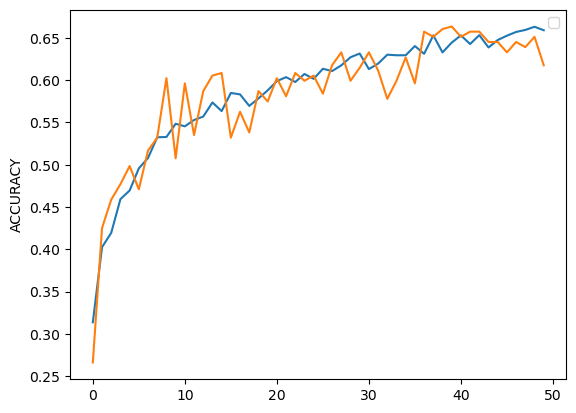

<AxesSubplot:>

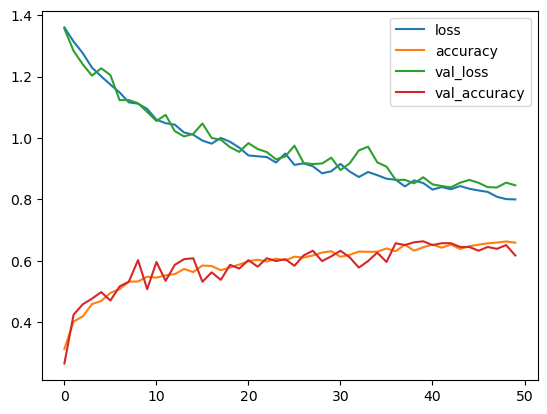

In [15]:
plt.plot(vgg16.history["accuracy"])
plt.plot(vgg16.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

Dict_Summary_5 = pd.DataFrame(vgg16.history)
Dict_Summary_5.plot()


# VGG19

In [16]:
from tensorflow.keras.applications import VGG19

base_model_6 = VGG19(input_shape = (150, 150, 3), # Shape of our images
include_top = True, # Leave out the last fully connected layer
weights = None)

for layer in base_model_6.layers:
    layer.trainable = False

In [17]:
last_output = base_model_6.layers[-1].output
x = Flatten()(last_output)
x = Dense(128, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)

model_6 = tf.keras.models.Model(base_model_6.input, x)
model_6.compile( loss = 'categorical_crossentropy',metrics = ['accuracy'], 
              optimizer='adam')

In [52]:
model_6.summary()
number_of_layers = len(model_6.layers)
print("Number of layers:", number_of_layers)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [19]:
vgg19 = model_6.fit(datagen.flow(X_train,Y_train,batch_size = 40), epochs = number_of_epochs ,validation_data=(X_test,Y_test),
                    verbose=1, callbacks=[Call_Back_Early, Call_Back_Check])

Epoch 1/50
74/74 [==============================] - 155s 2s/step - loss: 1.3637 - accuracy: 0.2778 - val_loss: 1.3617 - val_accuracy: 0.2844
Epoch 2/50
74/74 [==============================] - 165s 2s/step - loss: 1.3587 - accuracy: 0.2857 - val_loss: 1.3616 - val_accuracy: 0.2905
Epoch 3/50
74/74 [==============================] - 165s 2s/step - loss: 1.3587 - accuracy: 0.2710 - val_loss: 1.3619 - val_accuracy: 0.2905
Epoch 4/50
74/74 [==============================] - 165s 2s/step - loss: 1.3587 - accuracy: 0.2836 - val_loss: 1.3615 - val_accuracy: 0.2844
Epoch 5/50
74/74 [==============================] - 164s 2s/step - loss: 1.3585 - accuracy: 0.2857 - val_loss: 1.3617 - val_accuracy: 0.2905
Epoch 6/50
74/74 [==============================] - 167s 2s/step - loss: 1.3583 - accuracy: 0.2921 - val_loss: 1.3617 - val_accuracy: 0.2905
Epoch 7/50
74/74 [==============================] - 166s 2s/step - loss: 1.3582 - accuracy: 0.2836 - val_loss: 1.3611 - val_accuracy: 0.2905
Epoch 8/50
74

In [20]:
Model_Results_6 = model_6.evaluate(X_test,Y_test,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_6[0])
print("ACCURACY:  " + "%.2f" % Model_Results_6[1])

LOSS:  1.3516
ACCURACY:  0.33


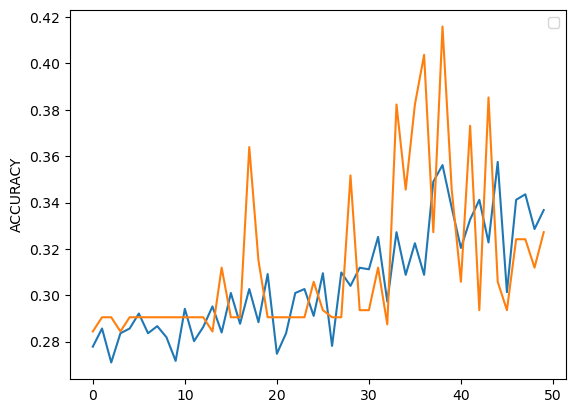

<AxesSubplot:>

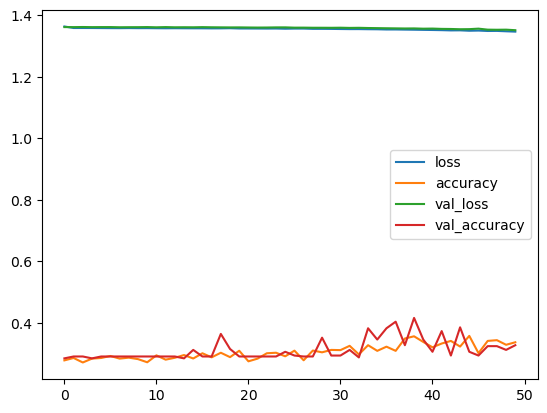

In [21]:
plt.plot(vgg19.history["accuracy"])
plt.plot(vgg19.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

Dict_Summary_6 = pd.DataFrame(vgg19.history)
Dict_Summary_6.plot()

# EfficientNet

In [22]:
from tensorflow.keras.applications import EfficientNetB0
base_model_8 = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [23]:
model_8 = base_model_8.output
model_8 = tf.keras.layers.GlobalAveragePooling2D()(model_8)
model_8 = tf.keras.layers.Dropout(rate=0.5)(model_8)
model_8 = tf.keras.layers.Dense(4,activation='softmax')(model_8)
model_8 = tf.keras.models.Model(inputs=base_model_8.input, outputs = model_8)

In [24]:
model_8.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [53]:
model_8.summary()
number_of_layers = len(model_8.layers)
print("Number of layers:", number_of_layers)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 150, 150, 3)  0           ['normalization[0][0]']    

 block2b_expand_conv (Conv2D)   (None, 38, 38, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 38, 38, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 38, 38, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 38, 38, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 19, 19, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 19, 19, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 19, 19, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_s

 block4b_activation (Activation  (None, 10, 10, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 10, 10, 480)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_conv (Conv2D)  (None, 10, 10, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 10, 10, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 10, 10, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 10, 10, 112)  0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_e

 block6b_add (Add)              (None, 5, 5, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 5, 5, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 5, 5, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 5, 5, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block7a_expand_bn (BatchNormal  (None, 5, 5, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 5, 5, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 5, 5, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 5, 5, 1152)  4608        ['block7a_dwconv[0][0]']         
 )        

In [25]:
effnet = model_8.fit(datagen.flow(X_train,Y_train,batch_size = 40), epochs = number_of_epochs ,validation_data=(X_test,Y_test),
                    verbose=1)

Epoch 1/50
74/74 [==============================] - 167s 2s/step - loss: 0.4785 - accuracy: 0.8219 - val_loss: 0.7652 - val_accuracy: 0.8073
Epoch 2/50
74/74 [==============================] - 150s 2s/step - loss: 0.1817 - accuracy: 0.9360 - val_loss: 0.4709 - val_accuracy: 0.8563
Epoch 3/50
74/74 [==============================] - 149s 2s/step - loss: 0.1521 - accuracy: 0.9499 - val_loss: 0.5454 - val_accuracy: 0.8349
Epoch 4/50
74/74 [==============================] - 151s 2s/step - loss: 0.0815 - accuracy: 0.9711 - val_loss: 0.5093 - val_accuracy: 0.8899
Epoch 5/50
74/74 [==============================] - 151s 2s/step - loss: 0.0971 - accuracy: 0.9683 - val_loss: 1.1001 - val_accuracy: 0.7156
Epoch 6/50
74/74 [==============================] - 151s 2s/step - loss: 0.0809 - accuracy: 0.9717 - val_loss: 0.3828 - val_accuracy: 0.9052
Epoch 7/50
74/74 [==============================] - 151s 2s/step - loss: 0.0764 - accuracy: 0.9782 - val_loss: 0.1650 - val_accuracy: 0.9511
Epoch 8/50
74

In [26]:
Model_Results_8 = model_8.evaluate(X_test,Y_test,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_8[1])
print("ACCURACY:  " + "%.2f" % Model_Results_8[1])


LOSS:  0.9694
ACCURACY:  0.97


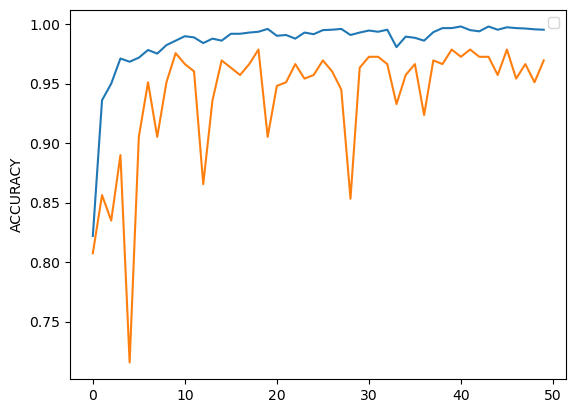

<AxesSubplot:>

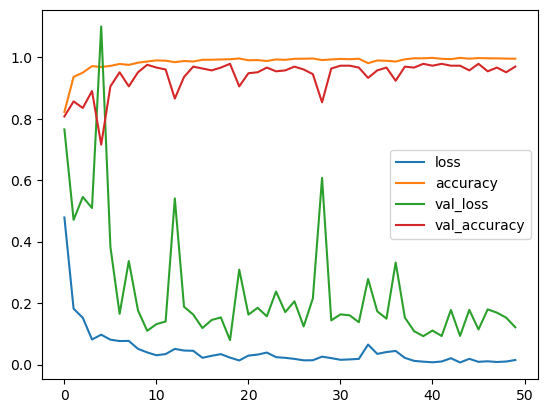

In [29]:
plt.plot(effnet.history["accuracy"])
plt.plot(effnet.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

Dict_Summary_8= pd.DataFrame(effnet.history)
Dict_Summary_8.plot()

# MobileNet

In [30]:
from tqdm import tqdm
X_train = []
Y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('Healthcare','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Healthcare','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 200.42it/s]


In [31]:
X_train, Y_train = shuffle(X_train,Y_train, random_state=101)
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train, test_size=0.1,random_state=101)

In [32]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)


Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [33]:
img_size = 224
img_array = cv2.imread('Healthcare\Training\glioma_tumor\gg (10).jpg')
new_arr = cv2.resize(img_array,(img_size,img_size))

In [34]:
base_model_7 = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3))
for layer in base_model_7.layers:
    layer.trainable = False

In [35]:
x = Flatten()(base_model_7.output)
x = Dense(128, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)

model_7 = tf.keras.models.Model(base_model_7.input, x)
model_7.summary()
number_of_layers = len(model_7.layers)
print("Number of layers:", number_of_layers)
model_7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [37]:
Model_Results_7 = model_7.evaluate(X_test,Y_test,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_7[1])
print("ACCURACY:  " + "%.2f" % Model_Results_7[1])

LOSS:  0.7339
ACCURACY:  0.73


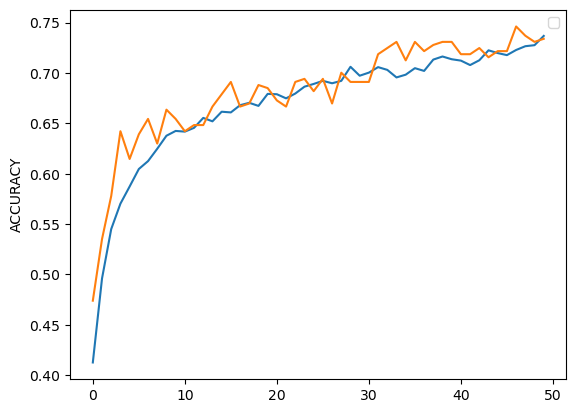

<AxesSubplot:>

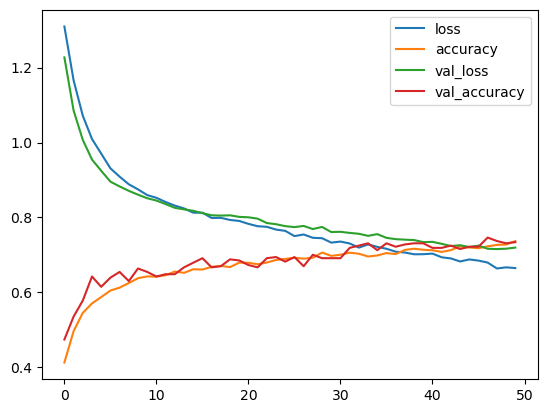

In [38]:
plt.plot(mobnet.history["accuracy"],label="accuracy")
plt.plot(mobnet.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

Dict_Summary_7 = pd.DataFrame(mobnet.history)
Dict_Summary_7.plot()


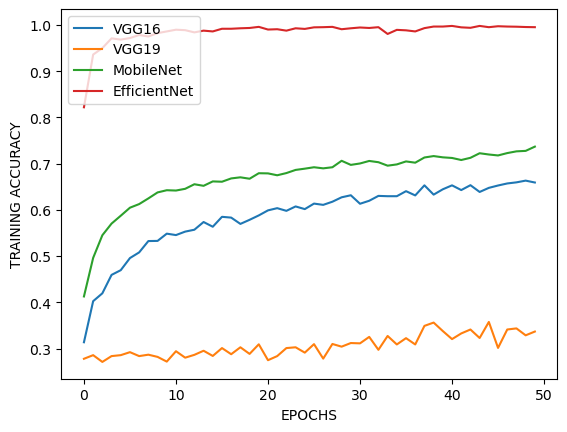

In [45]:
plt.plot(vgg16.history["accuracy"])
plt.plot(vgg19.history["accuracy"])
plt.plot(mobnet.history["accuracy"])
plt.plot(effnet.history["accuracy"])
plt.ylabel("TRAINING ACCURACY")
plt.xlabel("EPOCHS")
plt.legend(['VGG16','VGG19','MobileNet','EfficientNet'])
plt.show()

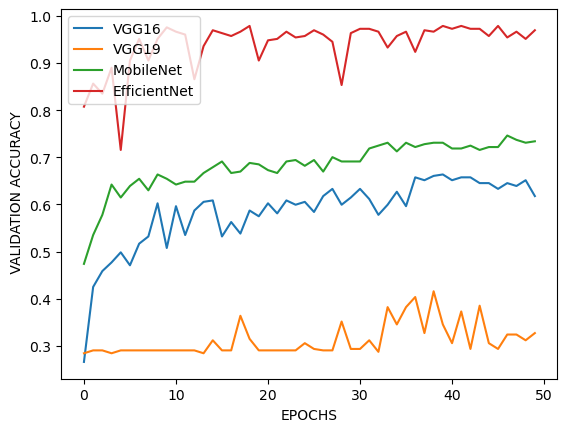

In [46]:
plt.plot(vgg16.history["val_accuracy"])
plt.plot(vgg19.history["val_accuracy"])
plt.plot(mobnet.history["val_accuracy"])
plt.plot(effnet.history["val_accuracy"])
plt.ylabel(" VALIDATION ACCURACY")
plt.xlabel("EPOCHS")
plt.legend(['VGG16','VGG19','MobileNet','EfficientNet'])
plt.show()